In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data
df = pd.read_csv('sales_2019_combined.csv')
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#Size of the dataset. It has 200000 rows and 6 attributes
print(df.shape)
df['Order ID'].nunique()
#There are duplicate rows because each row represents a single product sold. 
#Some people purchase 2 products - they have the same order ID.

(186862, 6)


178439

In [4]:
df.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186317,186316,186316,186316,186316,186316
unique,178439,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,366,21903,168552,21903,366,366


In [5]:
df = df[df['Order ID']!= 'Order ID']

In [6]:
#Checking the magnitude of null values
df.isnull().sum()

Order ID            545
Product             546
Quantity Ordered    546
Price Each          546
Order Date          546
Purchase Address    546
dtype: int64

In [7]:
#Deleting null values as they do not make large impact on the analysis 
df = df.dropna()

In [8]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
#Changing data types for easier analysis
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df.dtypes)

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [10]:
#Resetting index, clean data
df.reset_index(drop = True, inplace = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


# Analysis

### Sales By Month 

In [11]:
#Creating an Order Total Column
Order_Total = df['Quantity Ordered'] * df['Price Each']
df['Order Total'] = Order_Total
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [12]:
#Grouping data by Month and aggregating by the month
df1 = df.groupby(df['Order Date'].dt.strftime('%B'))['Order Total'].sum().reset_index()
df1 = pd.DataFrame(data = df1)
df1.shape

(12, 2)

In [13]:
df1=df1.rename(columns={'Order Date' : 'Month'})
df1.head()


,Month,Order Total
0,April,3.390670e+06
1,August,2.244468e+06
2,December,4.613443e+06
3,February,2.202022e+06
4,January,1.822257e+06


In [14]:
#introducing categorical to sort month column
df1['Month'] = pd.Categorical(df1['Month'], ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
df1 = df1.sort_values(by=['Month'])

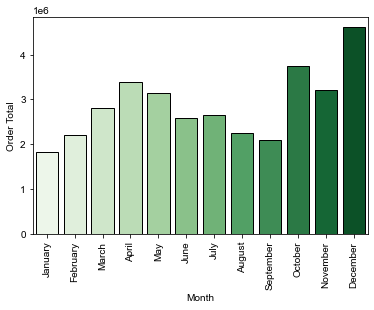

In [15]:
#plotting the results
g = sns.barplot(x=df1.Month, y=df1['Order Total'], data = df1, palette=('Greens'), edgecolor = 'black')
g.set_xticklabels(labels = df1.Month,rotation = 90)
sns.set(style='darkgrid')
plt.show()

### Sales by city

In [16]:
#Isolating city name and state. 
#I had to concatenate the state name because 2 cities had the same name, which would lead to confusion.
df['city1'] = df['Purchase Address'].apply(lambda x: x.split(',')[1]) #Isolating city name
df['state'] = df['Purchase Address'].apply(lambda x: x.split(',')[2]) #Isolating state and pincode
df['state1'] = df['state'].apply(lambda x: x.split(' ')[-2]) #Isolating state name from 'state' column
df['city'] = df['city1'] + " (" + df.state1 + ") " #new City column
df = df.drop(labels = ['city1', 'state', 'state1'], axis = 1) #Dropping unneccessary columns
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Total,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA)


In [17]:
df.city.unique()

array([' Dallas (TX) ', ' Boston (MA) ', ' Los Angeles (CA) ',
       ' San Francisco (CA) ', ' Seattle (WA) ', ' Atlanta (GA) ',
       ' New York City (NY) ', ' Portland (OR) ', ' Austin (TX) ',
       ' Portland (ME) '], dtype=object)

In [18]:
df2 = df.groupby(df['city'])['Order Total'].sum()
df2 = pd.DataFrame(df2, columns =  ['Order Total'])
df2.head()

,Order Total
city,
Atlanta (GA),2.795499e+06
Austin (TX),1.819582e+06
Boston (MA),3.661642e+06
Dallas (TX),2.767975e+06
Los Angeles (CA),5.452571e+06


<function matplotlib.pyplot.show(*args, **kw)>

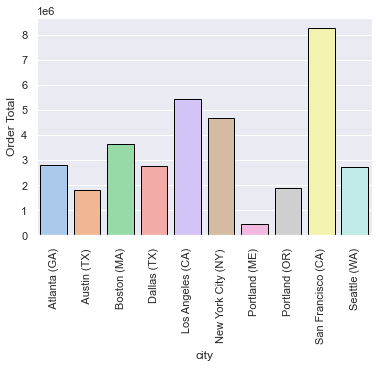

In [19]:
g = sns.barplot(x=df2.index, y=df2['Order Total'],data = df2, palette=('pastel'), edgecolor='black')
g.set_xticklabels(labels = df2.index,rotation = 90)
sns.set(style='darkgrid')
plt.show

### Sales By Hour

Looking at order counts and sums by the hour. The store can use this data to set employee shifts, and set advertisements

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Total,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA)


In [21]:
#Grouping by the hour (extracted from the Order Date column)
df3 =  df.groupby(df['Order Date'].dt.strftime('%H'))['Order Total'].count()
df3 = pd.DataFrame(data = df3)
df3.head()

,Order Total
Order Date,
00,3910
01,2350
02,1243
03,831
04,854


In [22]:
df3.rename(columns = {'Order Total' : 'Order Count'}, inplace = True)


In [23]:
df4 =  df.groupby(df['Order Date'].dt.strftime('%H'))['Order Total'].sum()
df4 = pd.DataFrame(data = df4)
df4.head()

,Order Total
Order Date,
00,713721.27
01,460866.88
02,234851.44
03,145757.89
04,162661.01


<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x00000209738AFC70>>

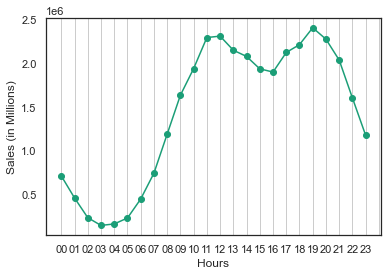

In [24]:
sns.set(style='white',palette='Dark2')
fig, ax1 = plt.subplots()
ax1.plot(df4.index, df4['Order Total'], marker = 'o')
#ax2 = ax1.twinx() - The part of the analysis removed because the count and sum plots were nearly identical
#ax2.plot(df3.Hour, df4['Order Total'])
ax1.set_xlabel('Hours')
ax1.set_ylabel('Sales (in Millions)')
ax1.set_xticks(list(range(25)))
ax1.grid(b = True, axis = 'x')
ax1.plot

### Market Basket Analysis 


Figuring out which products are sold in pairs. The store can put them next to each other to potentially increase the revenue

In [25]:
#Isolating the duplicate values in the Order ID column. 
#This will only keep orders that had more than one orders 
df5 = df[df['Order ID'].duplicated(keep=False)]
df5.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Total,city
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA)
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles (CA)
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles (CA)
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,Boston (MA)


In [26]:
#Using the transform function to concatenate vertically using a comma as a seperator.
df5['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df5.head()

<ipython-input-26-44fc472a8f05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Total,city,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,Boston (MA),"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [27]:
#Keeping the relavent columns
#Dropping the duplicate rows
df5 = df5[['Order ID', 'Grouped']].drop_duplicates().reset_index(drop=True)
df5.head()

,Order ID,Grouped
0,176560,"Google Phone,Wired Headphones"
1,176574,"Google Phone,USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176586,"AAA Batteries (4-pack),Google Phone"
4,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [29]:
#Creating a dataframe 
solution = df5['Grouped'].value_counts()
solutiondf = pd.DataFrame(solution) 
solutiondf.head()

,Grouped
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303


In [30]:
#Polishing the results. 
solutiondf['Items most frequently sold together'] = solutiondf.index
solutiondf = solutiondf.reset_index(drop=True)
solutiondf.rename(columns = {'Grouped':'Counts'}, inplace = True)
solutiondf.head(10)

,Counts,Items most frequently sold together
0,882,"iPhone,Lightning Charging Cable"
1,856,"Google Phone,USB-C Charging Cable"
2,361,"iPhone,Wired Headphones"
3,312,"Vareebadd Phone,USB-C Charging Cable"
4,303,"Google Phone,Wired Headphones"
5,286,"iPhone,Apple Airpods Headphones"
6,161,"Google Phone,Bose SoundSport Headphones"
7,104,"Vareebadd Phone,Wired Headphones"
8,77,"Google Phone,USB-C Charging Cable,Wired Headph..."
9,60,"Vareebadd Phone,Bose SoundSport Headphones"
